# **AI Assignment 3**

In [ ]:
!gdown --id 1qtB62eUVIhZ3qCeZ3hAIe9IGtp7xbBt3

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qtB62eUVIhZ3qCeZ3hAIe9IGtp7xbBt3
To: /content/Birds.zip
100% 1.47G/1.47G [00:27<00:00, 53.5MB/s]


In [ ]:
!unzip '/content/Birds.zip'

Archive:  /content/Birds.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data/test_data/bon

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
test.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(12, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(24, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(36, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(62, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 59, 59, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 28, 28, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 36)     

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=25)

Epoch 1/25
19/19 [==============================] - 119s 7s/step - loss: 2.1202 - accuracy: 0.3267 - val_loss: 2.7389 - val_accuracy: 0.1975
Epoch 2/25
19/19 [==============================] - 80s 4s/step - loss: 2.0361 - accuracy: 0.3733 - val_loss: 3.1746 - val_accuracy: 0.1911
Epoch 3/25
19/19 [==============================] - 81s 4s/step - loss: 1.9136 - accuracy: 0.4133 - val_loss: 3.0073 - val_accuracy: 0.1847
Epoch 4/25
19/19 [==============================] - 81s 4s/step - loss: 1.7862 - accuracy: 0.4200 - val_loss: 2.9297 - val_accuracy: 0.1975
Epoch 5/25
19/19 [==============================] - 81s 4s/step - loss: 1.6574 - accuracy: 0.4533 - val_loss: 3.3994 - val_accuracy: 0.1338
Epoch 6/25
19/19 [==============================] - 79s 4s/step - loss: 1.6567 - accuracy: 0.4600 - val_loss: 3.0051 - val_accuracy: 0.1720
Epoch 7/25
19/19 [==============================] - 81s 4s/step - loss: 1.4497 - accuracy: 0.5067 - val_loss: 3.2679 - val_accuracy: 0.1975
Epoch 8/25
19/19 [=

In [ ]:
model.save('birdsWeights.h5')

In [ ]:
# Testing
import numpy as np
from tensorflow.keras.preprocessing import image

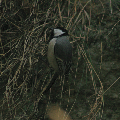

In [ ]:
img1 = image.load_img('/content/test_data/test_data/gretit/11776135285_ccf938fa2e_o.jpg',target_size=(120,120))
img1


In [ ]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
5
gretit


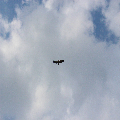

In [ ]:
img2=image.load_img('/content/test_data/test_data/himgri/IMG_5384.JPG',target_size=(120,120))
img2

In [ ]:
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
8
himgri


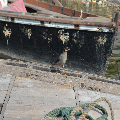

In [ ]:
img3=image.load_img('/content/test_data/test_data/cmnmyn/DSC_4681.jpg',target_size=(120,120))
img3

In [ ]:
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
4
cmnmyn


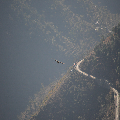

In [ ]:
img4=image.load_img('/content/test_data/test_data/indvul/DSC_1263.jpg',target_size=(120,120))
img4

In [ ]:
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
pred = np.argmax(model.predict(img4))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
10
indvul


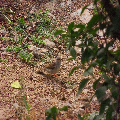

In [ ]:
img5=image.load_img('/content/test_data/test_data/hsparo/100_5573.JPG',target_size=(120,120))
img5

In [ ]:
img5 = image.img_to_array(img5)
img5 = np.expand_dims(img5,axis=0)
pred = np.argmax(model.predict(img5))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
9
hsparo
